# 使用R包一点点画图并且美化
说是美化不太合适，就是调整不同参数而已

以R自带数据集“Tooth Growth”为数据

以ggplot2及其扩展包作图添加error bar等

In [1]:
# 加载包
library(ggplot2)
library(ggpubr)
library(magrittr)
library(ggsignif)

Loading required package: magrittr


In [2]:
# 查看数据类型
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...


In [3]:
# 将dose列转为factor
ToothGrowth$dose <- as.factor(ToothGrowth$dose)

In [4]:
str(ToothGrowth)

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: Factor w/ 3 levels "0.5","1","2": 1 1 1 1 1 1 1 1 1 1 ...


# 四步绘图

##  ggboxplot绘制箱线图并添加error bar和points

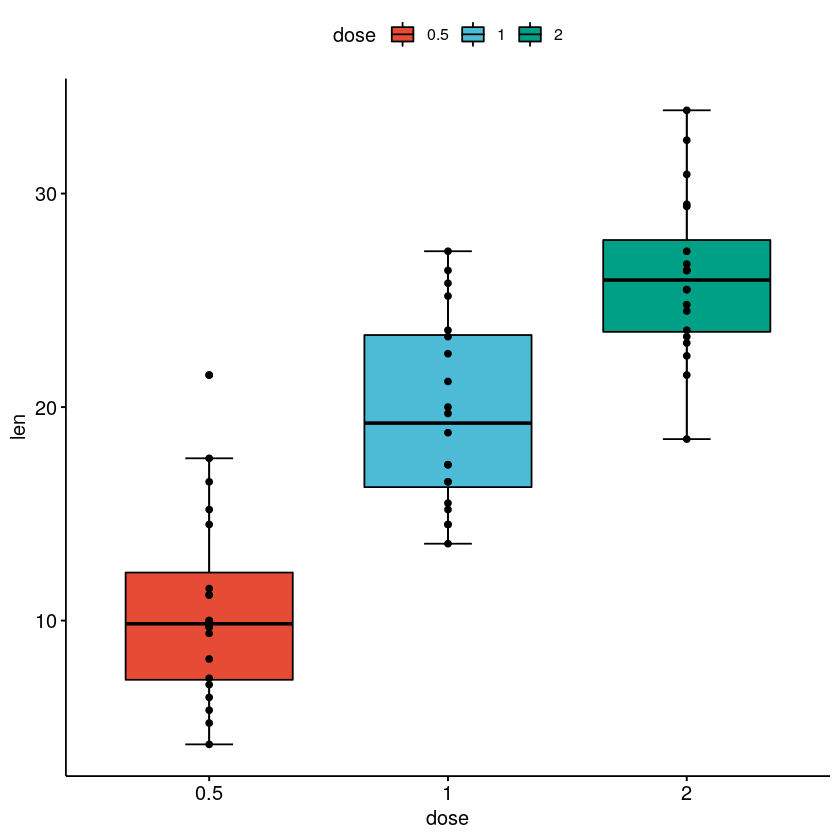

In [5]:
p <- ggboxplot(ToothGrowth, x = "dose", y = "len", fill = "dose" , 
          bxp.errorbar = T, bxp.errorbar.width = 0.2, 
          palette = "npg", add = "point") 
p

## 添加labs，即说明文字

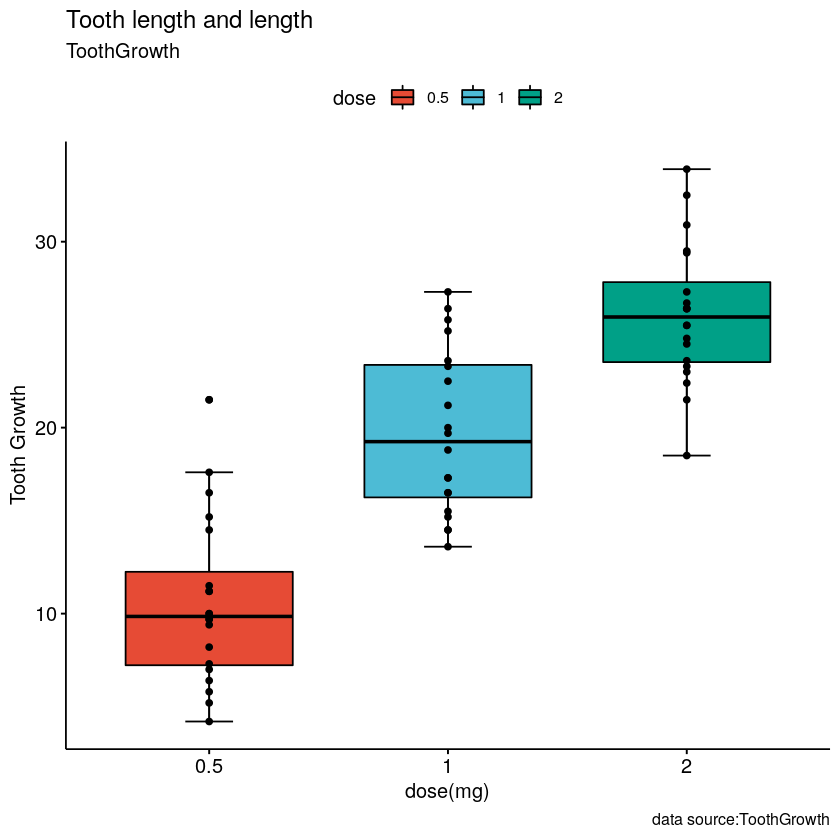

In [6]:
p <- p + labs(title = "Tooth length and length",
     subtitle = "ToothGrowth",
     caption = "data source:ToothGrowth",
     x = "dose(mg)",
     y = "Tooth Growth") 
p

## 两两比较进行t检验并添加显著性水平

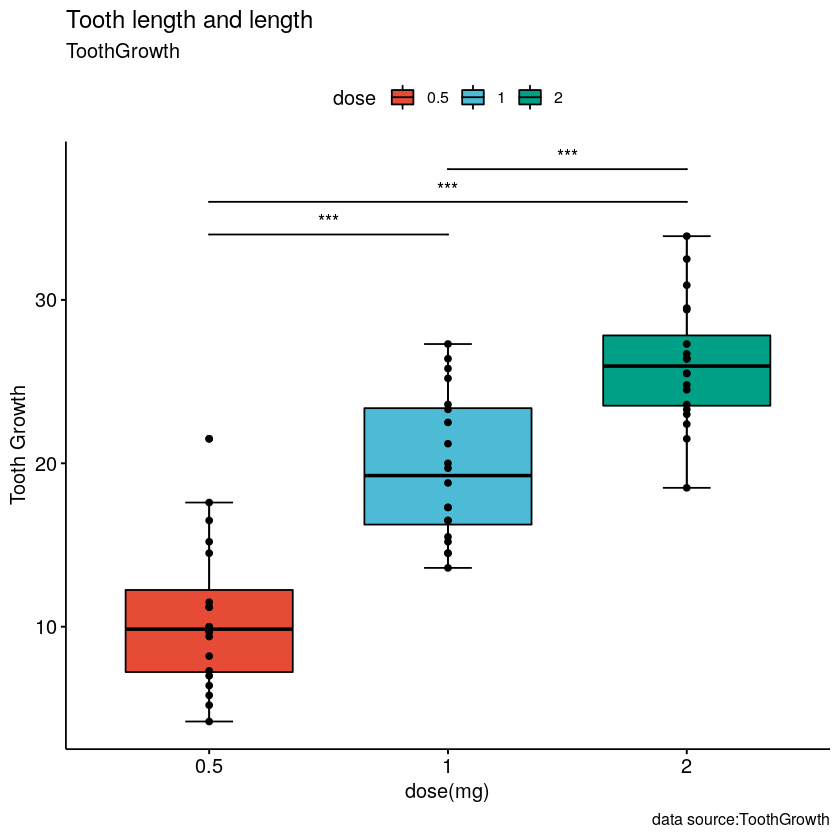

In [7]:
p <- p + geom_signif(comparisons = list(c("0.5","1"),c("0.5","2"),c("1","2")),
            y_position = c(34,36,38),map_signif_level = T, 
            test = t.test,tip_length = c(0))
p

## 修改默认主题并美化，以16进制颜色改变色彩

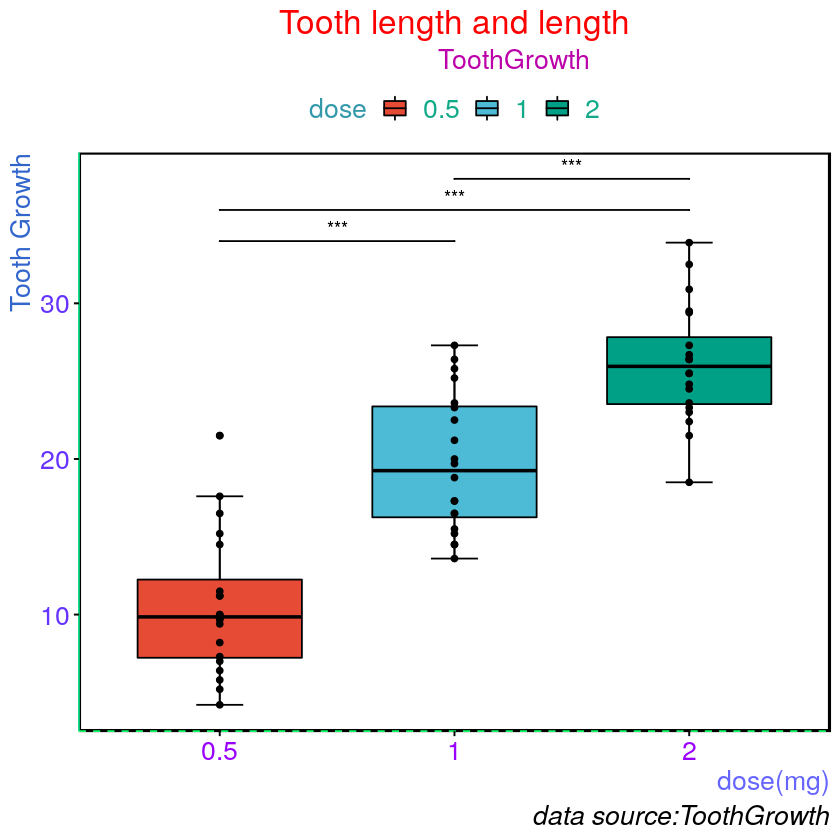

In [8]:
p <- p + theme(plot.background = element_rect(fill = "#FFFFFF"),
      plot.caption = element_text(color = "black",size = 16,hjust = 1,face = "italic"),
     plot.title = element_text(color = "red",size = 20,hjust = 0.5),
     plot.subtitle = element_text(color = "#BB00AA",size = 16,hjust = 0.6,angle = 0),
     axis.text.x = element_text(color = "#9900FF",size = 16,angle = 0),
     axis.text.y = element_text(color = "#6633FF",size = 16),
     axis.title.x = element_text(color = "#6666FF",size = 16,hjust = 1),
     axis.title.y = element_text(color = "#3366CC",size = 16,hjust = 1),
     legend.title = element_text(color = "#3399AA",size = 16),
     legend.text = element_text(color = "#11AA88",size = 16),
     axis.line.y = element_line(color = "#11DD88",linetype = 1),
     axis.line.x = element_line(color = "#11FF66",linetype = 8),
     panel.border = element_rect(linetype = 7,size = 1.2,color = "black",fill = NA))
p

差不多是按照网上的源码手敲了两遍，更改了些参数，直接独立写出来还做不到，不过可以看帮助，函数的可调参数太多了

### reference
[原文短链接地址](http://985.so/ctWH)